In [1]:
import csv
import numpy as np
from collections import defaultdict
from matplotlib import pyplot
import pandas

In [2]:
BLANKS=["","RBNF1", "RBNF2", "RBNF", "0", "RBNF 1", "RBNF 2"]
#TOTAL= 5048
TOTAL=2734
#TOTAL=1351
#TOTAL=1201
#TOTAL=1168


In [3]:
def loadCsvData(fileName):
	matrix = []
	# open a file
	with open(fileName) as f:
		reader = csv.reader(f)

		# loop over each row in the file
		for row in reader:

			# cast each value to a float
			doubleRow = []
			for value in row:
				doubleRow.append(value.strip())

			# store the row into our matrix
			matrix.append(doubleRow)
	return matrix

In [4]:
def printData(matrix):
	for row in matrix:
		print (row)

In [5]:
data= loadCsvData("data/metadata.csv")

In [6]:
data=pandas.DataFrame(data[1:], columns=data[0])

In [7]:
interviewtxt =loadCsvData("data/interview text fille to ids.csv")

In [8]:
interviewtxt=pandas.DataFrame(interviewtxt[1:], columns=interviewtxt[0])


In [9]:
text_to_ids={}
for i in range(len(interviewtxt)):
    name=interviewtxt.at[i, interviewtxt.columns[0]]
    name=name[:name.rfind('.')]
    name=name.replace('\'','_')
    text_to_ids[name]=interviewtxt["interviewee_ids"][i].split(';')

In [10]:
ids_to_years=defaultdict(lambda: "0")
for i in range(len(interviewtxt)):
    date=interviewtxt["date_of_first_interview"][i]
    year=date[date.rfind('/')+1:]
    ids=interviewtxt["interviewee_ids"][i].split(';')
    for num in ids:
        ids_to_years[num]= str(year)

In [11]:
database=defaultdict(lambda: defaultdict(lambda:0))
for i in range(len(data)):
    for atr in data.columns:
        if atr== "researcher_assumed_birth_decade":
            continue
        if atr== "researcher_assumed_race":
            continue
        value= data[atr][i]
        if value in BLANKS and atr=="\ufeffbirth_decade":
            value= data.loc[i, "researcher_assumed_birth_decade"]
        if value in BLANKS and atr=="identified_race":
            value= data.loc[i, "researcher_assumed_race"]
        if value in BLANKS and atr == "real_interviewee_birth_year":
            value= data.loc[i, "approximate_interviewee_birth_year"]
        database[data.loc[i, "interviewee_id"]][atr]=value
    database[data.loc[i, "interviewee_id"]]["interview_year"]=ids_to_years[data.loc[i, "interviewee_id"]]

In [12]:
dataformatted=defaultdict(lambda: defaultdict(lambda:0))
for i in database : 
    if database[i]["sex"]=="Male":
        continue
    for atr in database[i]:
        value= database[i][atr]
        if value not in BLANKS:
            dataformatted[atr][value]+=1
print(dataformatted["real_interviewee_birth_year"])
for cat in dataformatted:
    total=0
    for x in dataformatted[cat]:
        total+= dataformatted[cat][x]
    dataformatted[cat]["No Info"]= TOTAL-total
        

    
        

defaultdict(<function <lambda>.<locals>.<lambda> at 0x7f835b631d08>, {'1897': 14, '1893': 9, '1902': 14, '1890': 2, '1898': 10, '1915': 36, '1900': 9, '1901': 6, '1888': 2, '1896': 11, '1906': 13, '1904': 6, '1903': 12, '1895': 3, '1899': 7, '1912': 34, '1885': 4, '1935': 52, '1905': 12, '1892': 6, '1910': 16, '1907': 17, '1886': 1, '1884': 1, '1913': 38, '1916': 29, '1917': 30, '1874': 1, '1941': 43, '1938': 50, '1927': 41, '1929': 34, '1945': 63, '1953': 51, '1947': 75, '1933': 31, '1909': 8, '1931': 46, '1943': 70, '1923': 47, '1918': 28, '1944': 70, '1989': 3, '1924': 66, '1930': 42, '1937': 58, '1948': 66, '1966': 10, '1972': 9, '1942': 50, '1925': 62, '1921': 37, 'h': 1, '1946': 60, '1934': 37, '1954': 43, '1922': 59, '1911': 21, '1958': 31, '1891': 3, '1988': 2, '1940': 56, '1957': 38, '1959': 12, '1960': 26, '1952': 49, '1939': 48, '1919': 28, '1914': 28, '1928': 24, '1932': 40, '1950': 51, '1926': 47, '1964': 33, '1908': 13, '1968': 8, '1936': 61, '1962': 22, '1920': 39, '1951

In [13]:
unknown=[]
for x in database:
    if database[x]['current_or_most_recent_occupation'] in BLANKS and database[x]["sex"]!="Male":
        unknown.append(database[x]["interviewee_name"])


In [14]:
for table in dataformatted:
    for x,y in dataformatted[table].items():
        print("{}: {}".format(x,y))
        #print(x)
        #print(y)

1890: 64
1900: 109
1910: 288
1880: 13
1930: 466
1870: 2
1940: 608
1920: 455
1950: 396
1980: 41
1960: 184
1970: 67
1990: 8
1970-1980: 1
1950s: 1
1940s: 1
No Info: 30
Black or African American: 1201
White: 1351
Asian: 42
Hispanic/Latinx: 29
Other Race: 5
Two or More Races: 27
Indigenous American or Alaska Native: 67
No Info: 12
Married (except if separated): 970
Widowed: 247
Divorced: 154
Never married: 72
Separated: 3
Single: 52
Domestic Partner: 1
Common Law: 1
No Info: 1234
High school graduate: 205
Bachelor's degree: 638
Graduate or professional degree: 1168
Associate's degree: 36
Some college: 412
9th to 12th grade but no diploma: 114
Less than 9th grade: 41
No Info: 120
Female: 2734
No Info: 0
Abbott, Jessie: 1
Adair, Christia: 1
Adams, Frankie V.: 1
Adams, Kathleen Redding: 1
Albrier, Frances Mary: 1
Alexander, Margaret Walker: 1
Alexander, Sadie: 1
Barker, Elizabeth Cordozo: 1
Barnett, Etta Moten: 1
Boyd, Norma: 1
Cass, Melnea: 1
Chinn, May Edward: 1
Craft, Juanita Jewel: 1
Dicks

Finley, Nancy: 1
Fischer, Sandy: 1
Garber, Carolyn: 1
Hooper, Rhonda: 1
Horning, Jamie: 1
Jameson, Dorothy: 1
Jones, Billie: 1
Jones, Marilyn: 1
Knight, Sue: 1
Laster, Kathleen: 1
Leven, Dorothy: 1
Meissner, Carol: 1
Parker, Leona "Cissie": 1
Roth, Miriam "Mim" Oesch: 1
Stromberg, Frances: 1
Terpening, Sonya: 1
Turner, Ann Pitts: 1
Wade, Linda: 1
Warren, Sue: 1
Bockelman, Barbara: 1
Couch, Aline: 1
Wood, Lula: 1
Weeks, Emma: 1
Focks, Vernal: 1
Pate, Christine: 1
Eells, Lillian: 1
Hardison, Luella: 1
Brown, Mildred: 1
Carnagey, Marvin: 1
Carnagey, Laverta: 1
Cole, Bessie: 1
Hedges, Sue: 1
Jones, Margie: 1
Crispin, Fern: 1
Goetzinger, Velma: 1
Curfman, Pauline: 1
Cross, Elizabeth: 1
Dyer, Beatrice: 1
Smith, Louise: 1
Hale, Garnett: 1
Moore, Faye: 1
Ray, Olive: 1
Coulson, Louella: 1
Cunningham, Faye: 1
Cole, Bertha: 1
Boyd, Verla: 1
Hay, Ruby: 1
Fuqua, Ada: 1
Redinger, Leota: 1
Strecker, Allie: 1
Biggs, Veda: 1
Gaylord, Lavona: 1
Herald, Bessie: 1
Geist, Mildred: 1
Stevens, Betty: 1
Murph

VEE32: 1
VEE33: 1
VEE34: 1
VEE35: 1
VEE36: 1
VEE37: 1
VEE38: 1
VEE39: 1
VEE40: 1
VEE41: 1
VEE42: 1
VEE43: 1
VEE44: 1
VEE45: 1
VEE46: 1
VEE47: 1
VEE48: 1
VEE49: 1
VEE50: 1
VEE51: 1
VEE52: 1
VEE53: 1
VEE54: 1
VEE55: 1
VEE56: 1
VEE57: 1
VEE58: 1
VEE59: 1
VEE60: 1
VEE61: 1
VEE62: 1
VEE63: 1
VEE64: 1
VEE65: 1
VEE66: 1
VEE67: 1
VEE68: 1
VEE69: 1
VEE70: 1
VEE71: 1
VEE72: 1
VEE73: 1
VEE74: 1
VEE75: 1
VEE76: 1
VEE77: 1
VEE78: 1
VEE79: 1
VEE80: 1
VEE81: 1
VEE82: 1
VEE83: 1
VEE84: 1
VEE85: 1
VEE86: 1
VEE87: 1
VEE88: 1
VEE89: 1
VEE90: 1
VEE91: 1
VEE92: 1
VEE93: 1
VEE94: 1
VEE95: 1
VEE96: 1
VEE97: 1
VEE98: 1
VEE99: 1
VEE100: 1
VEE101: 1
VEE102: 1
VEE103: 1
VEE104: 1
VEE105: 1
VEE106: 1
VEE107: 1
VEE108: 1
VEE109: 1
VEE110: 1
VEE111: 1
VEE112: 1
VEE113: 1
VEE114: 1
VEE115: 1
VEE116: 1
VEE117: 1
VEE118: 1
VEE119: 1
VEE120: 1
VEE121: 1
VEE122: 1
VEE123: 1
VEE124: 1
VEE125: 1
VEE126: 1
VEE127: 1
VEE128: 1
VEE129: 1
VEE130: 1
VEE131: 1
VEE132: 1
VEE133: 1
VEE134: 1
VEE135: 1
VEE136: 1
VEE137: 1
VEE138: 

VEE1982: 1
VEE1983: 1
VEE1984: 1
VEE1985: 1
VEE1986: 1
VEE1987: 1
VEE1988: 1
VEE1989: 1
VEE1990: 1
VEE1991: 1
VEE1992: 1
VEE1993: 1
VEE1994: 1
VEE1995: 1
VEE1996: 1
VEE1997: 1
VEE1998: 1
VEE1999: 1
VEE2000: 1
VEE2001: 1
VEE2002: 1
VEE2003: 1
VEE2004: 1
VEE2005: 1
VEE2006: 1
VEE2007: 1
VEE2008: 1
VEE2009: 1
VEE2010: 1
VEE2011: 1
VEE2014: 1
VEE2017: 1
VEE2019: 1
VEE2020: 1
VEE2021: 1
VEE2023: 1
VEE2024: 1
VEE2027: 1
VEE2028: 1
VEE2036: 1
VEE2037: 1
VEE2042: 1
VEE2043: 1
VEE2044: 1
VEE2045: 1
VEE2046: 1
VEE2047: 1
VEE2048: 1
VEE2049: 1
VEE2050: 1
VEE2053: 1
VEE2055: 1
VEE2059: 1
VEE2060: 1
VEE2061: 1
VEE2062: 1
VEE2063: 1
VEE2065: 1
VEE2066: 1
VEE2067: 1
VEE2069: 1
VEE2070: 1
VEE2071: 1
VEE2073: 1
VEE2076: 1
VEE2077: 1
VEE2078: 1
VEE2079: 1
VEE2080: 1
VEE2081: 1
VEE2083: 1
VEE2084: 1
VEE2086: 1
VEE2087: 1
VEE2090: 1
VEE2091: 1
VEE2092: 1
VEE2094: 1
VEE2095: 1
VEE2099: 1
VEE2101: 1
VEE2104: 1
VEE2105: 1
VEE2106: 1
VEE2107: 1
VEE2110: 1
VEE2112: 1
VEE2116: 1
VEE2128: 1
VEE2131: 1
VEE2132: 1

Nonprofit director, university administrator: 1
Environmental anaylst: 1
Homemaker, teacher: 1
Freelance translator and editor: 1
IT engineer: 1
Financial advisor: 1
Community gardner, boutique owner: 1
Children's book author, homemaker: 1
Author, marketing consultant: 1
Photographer, arts consultant: 1
County government administrator: 1
Episcopal priest: 1
Unitarian minister: 1
Doula, yoga instructor: 1
Health care administrator: 1
Teacher, musician: 1
Speech Pathologist: 1
Computer Programmer: 1
Past President Junior League of San Diego; On board of Las Patronas, Catalina Island Conservancy, San Diego Foundation, San Diego Crew Classic Foundation, Stanford Athletic Board, and Francis Parker School: 1
Special Education and Reading Teacher: 1
Chair of Personal Commission at Paaro Valley Unified School District: 1
Professor, Boston University: 1
Vice-President, Foothill College: 1
Psychologist and Author: 1
physician: 1
Member of Napa County Commission on Aging: 1
Volunteer: 1
National 

1901: 1
1936: 22
1938: 18
1962: 6
1921: 4
1920: 7
1910: 2
1956: 7
1923: 4
1969: 4
1940: 18
1965: 4
1963: 7
1960: 6
1955: 8
1967: 4
1937: 24
1975: 4
1935: 9
1985: 2
1986: 5
1919: 1
1961: 5
1977: 2
1979: 11
1984: 6
1951: 4
1987: 6
1964: 9
1982: 1
1981: 2
1990: 3
1976: 6
1970: 1
1980: 3
1983: 2
1925: 2
1949: 4
1994: 1
1989: 1
1900: 2
1928: 2
1899: 1
1971: 1
1939: 7
1933: 1
1974: 1
1973: 1
1995: 1
1996: 1
1997: 1
No Info: 2245


In [15]:
#def checkAProfile(data, race, sex, education, birthdecade, exact):
#    total=0
#    attr=[("identified_race", race), ("sex", sex), ("education", education), ("\ufeffbirth_decade", birthdecade)]
#    for i in data: 
#        if exact:
#            skip=False
#            for a in attr:
#                if data[i][a[0]] in BLANKS and a[1] != "":
#                    skip=True
#           if skip:
#                continue
#        skip=False   
#        for a in attr:
#            cat= data[i][a[0]]
#            if a[1] != "" and cat not in BLANKS and cat != a[1]:
#                skip=True
#        if skip:
#            continue
#        total+=1
#    return total
    
    

In [16]:
ids_to_info=defaultdict(lambda: defaultdict(lambda:0))
for ids in database:
    ids_to_info[ids]["birth_decade"]=database[ids]["\ufeffbirth_decade"]
    ids_to_info[ids]["education"]=database[ids]["education"]
    ids_to_info[ids]["collection"]=database[ids]["collection_id"]
    ids_to_info[ids]["sex"]=database[ids]["sex"]
    ids_to_info[ids]["race"]=database[ids]["identified_race"]
    ids_to_info[ids]["interview_year"]=database[ids]["interview_year"]
    ids_to_info[ids]["birth_year"]=database[ids]["real_interviewee_birth_year"]


In [17]:
myfile = open("data/everything_but_falsehits_and_needsreview.txt")
txt = myfile.read()
myfile.close()

files=[]
tokens=txt.split()
for i in tokens:
    num= i.find("Files\\\\")
    if not num==-1:
        if not i.find("_")==-1:
            files.append(i.strip())
names=set()
for i in files:
    i=i[i.find("\\\\",8)+2:-1]
    names.add(i.strip())


In [33]:
decades=[]
for i in range(1870, 2000, 10):
    decades.append(str(i))
decades.append("No Info")
total=[]
for i in decades:
    total.append(dataformatted["\ufeffbirth_decade"][i])
hits=defaultdict(lambda:0)
for x in names:
    id_nums=text_to_ids[x]
    for num in id_nums:
        hits[ids_to_info[num]["birth_decade"]]+=1
hits_formatted=[]
for i in decades:
    hits_formatted.append(hits[i])
percentage_withNI=[]
percentage_noNI=[]
totalnum=sum(total)
print(totalnum)
for i in range(len(decades)):
    percentage_withNI.append(int(hits_formatted[i]/total[i]*100))
    #if not i==len(decades)-1:
    #    percentage_noNI.append(int(hits_formatted[i]/(total[i])*100))
#percentage_noNI.append(None)


2731


In [34]:
df_decades = pandas.DataFrame([total, hits_formatted, percentage_withNI], index=["total corpus", "in rape cluster", "Percentage Within Category"],columns=decades)

In [35]:
display(df_decades)

,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,No Info
total corpus,2,13,64,109,288,455,466,608,396,184,67,41,8,30
in rape cluster,0,2,14,18,24,56,65,151,90,38,13,7,0,0
Percentage Within Category,0,15,21,16,8,12,13,24,22,20,19,17,0,0


Corpus Interviewees by Birth Decades and Percent of Interviewees by Birth Decade whose Interviews Include Rape Terms

Table: splits whole corpus by birth decade, displays how many in corpus born in that decade, how many in the rape cluster were born that decade, and what percentage of the people born in that decade are in the rape cluster

In [36]:
decades=[]
for i in range(1870, 2000, 10):
    decades.append(str(i))
decades.append("No Info")
total=[]
for i in decades:
    total.append(dataformatted["\ufeffbirth_decade"][i])
total_double=[]
for i in range(6):
    total_double.append(total[2*i]+total[2*i+1])
total_double.append(total[-2])
total_double.append(total[-1])
hits=defaultdict(lambda:0)
for x in names:
    id_nums=text_to_ids[x]
    for num in id_nums:
        hits[ids_to_info[num]["birth_decade"]]+=1
hits_formatted=[]
for i in decades:
    hits_formatted.append(hits[i])
hits_double=[]
for i in range(6):
    hits_double.append(hits_formatted[2*i]+hits_formatted[2*i+1])
hits_double.append(hits_formatted[-2])
hits_double.append(hits_formatted[-1])
percentage_withNI=[]
for i in range(len(total_double)):
    percentage_withNI.append(int(hits_double[i]/total_double[i]*100))
    #if not i==len(decades)-1:
    #    percentage_noNI.append(int(hits_formatted[i]/(total[i])*100))
#percentage_noNI.append(None)
print(sum(total_double))

2731


In [37]:
df_decades = pandas.DataFrame([total_double, hits_double, percentage_withNI], index=["total corpus", "in rape cluster", "Percentage Within Category"],columns=["1870-1889", "1890-1909", "1910-1929", "1930-1949", "1950-1969", "1970-1989", "1990-1999", "No Info"])

In [38]:
display(df_decades)

,1870-1889,1890-1909,1910-1929,1930-1949,1950-1969,1970-1989,1990-1999,No Info
total corpus,15,173,743,1074,580,108,8,30
in rape cluster,2,32,80,216,128,20,0,0
Percentage Within Category,13,18,10,20,22,18,0,0


Corpus Interviewees by Birth Scores and Percent of Interviewees by Birth Score whose Interviews Include Rape Terms

Table: splits whole corpus by birth score, displays how many in corpus born in that score, how many in the rape cluster were born that score, and what percentage of the people born in that score are in the rape cluster

In [39]:
race=[]
for i in dataformatted["identified_race"]:
    race.append(i)
race.remove("No Info")
race.sort()
race.append("No Info")
total=[]
for i in race:
    total.append(dataformatted["identified_race"][i])
hits=defaultdict(lambda:0)
for x in names:
    id_nums=text_to_ids[x]
    for num in id_nums:
        hits[ids_to_info[num]["race"]]+=1
hits_formatted=[]
for i in race:
    hits_formatted.append(hits[i])
percentage_withNI=[]
percentage_noNI=[]
totalnum=sum(total)
for i in range(len(race)):
    percentage_withNI.append(int(hits_formatted[i]/total[i]*100))
    #if not i==len(race)-1:
    #    percentage_noNI.append(int(hits_formatted[i]/(totalnum-total[-1])*100))
#percentage_noNI.append(None)

In [40]:
df_race = pandas.DataFrame([total, hits_formatted, percentage_withNI],index=["total corpus", "in rape cluster", "Percentage Within Category"], columns=race)

In [41]:
display(df_race)

,Asian,Black or African American,Hispanic/Latinx,Indigenous American or Alaska Native,Other Race,Two or More Races,White,No Info
total corpus,42,1201,29,67,5,27,1351,12
in rape cluster,14,270,6,5,1,6,177,0
Percentage Within Category,33,22,20,7,20,22,13,0


Corpus Interviewees by Race and Percent of Interviewees by Race whose Interviews Include Rape Terms

Table: splits whole corpus by race, displays how many in corpus of a given race, how many in the rape cluster were of a given race, and what percentage of the people of said race are in the rape cluster

In [42]:
education=["Less than 9th grade", "9th to 12th grade but no diploma", "High school graduate", "Some college", "Associate's degree", "Bachelor's degree", "Graduate or professional degree", "No Info"]
total=[]
for i in education:
    total.append(dataformatted["education"][i])
hits=defaultdict(lambda:0)
for x in names:
    id_nums=text_to_ids[x]
    for num in id_nums:
        hits[ids_to_info[num]["education"]]+=1
hits_formatted=[]
for i in education:
    hits_formatted.append(hits[i])
total_correct=[sum(total[0:3]), sum(total[3:6]), total[-2], total[-1]]
hits_formatted_correct=[sum(hits_formatted[0:3]), sum(hits_formatted[3:6]), hits_formatted[-2], hits_formatted[-1]]
percentage_withNI=[]
percentage_noNI=[]
totalnum=sum(total)
for i in range(4):
    percentage_withNI.append(int(hits_formatted_correct[i]/total_correct[i]*100))
    #if not i==3:
    #    percentage_noNI.append((hits_formatted_correct[i]/(totalnum-total[-1])*100))
#percentage_noNI.append(None)

In [43]:
df_education = pandas.DataFrame([total_correct, hits_formatted_correct, percentage_withNI], index=["total corpus", "in rape cluster", "Percentage Within Category"], columns=["up to 12th grade", "up to college degree", "graduate or professional degree", "no info"])

In [44]:
display(df_education)

,up to 12th grade,up to college degree,graduate or professional degree,no info
total corpus,360,1086,1168,120
in rape cluster,41,185,241,0
Percentage Within Category,11,17,20,0


Corpus Interviewees by Education and Percent of Interviewees by Education whose Interviews Include Rape Terms

Table: splits whole corpus by education, displays how many in corpus have a certain level of education, how many in that education level were born that decade, and what percentage of the people with that education level are in the rape cluster

In [45]:
years=[]
for i in range(1972, 2019, 1):
    years.append(str(i))
years.append("No Info")
total=[]
for i in years:
    total.append(dataformatted["interview_year"][i])
hits=defaultdict(lambda:0)
for x in names:
    id_nums=text_to_ids[x]
    for num in id_nums:
        hits[ids_to_info[num]["interview_year"]]+=1
hits_formatted=[]
for i in years:
    hits_formatted.append(hits[i])
percentage_withNI=[]
percentage_noNI=[]
totalnum=sum(total)
print(totalnum)
for i in range(len(years)):
    if total[i]==0:
        percentage_withNI.append(0)
    else:    
        percentage_withNI.append(int(hits_formatted[i]/total[i]*100))
    #if not i==len(years)-1:
    #    percentage_noNI.append((hits_formatted[i]/(totalnum-total[-1])*100))
#percentage_noNI.append(None)

2732


In [46]:
df_interview_year = pandas.DataFrame([total, hits_formatted, percentage_withNI], index=["total corpus", "in rape cluster", "Percentage of total"], columns=years)

In [47]:
pandas.options.display.max_columns = 10

In [55]:
display(df_interview_year)

,1972,1973,1974,1975,1976,...,2015,2016,2017,2018,No Info
total corpus,4,5,19,9,20,...,121,130,57,9,188
in rape cluster,1,0,4,2,9,...,10,13,12,5,0
Percentage of total,25,0,21,22,45,...,8,10,21,55,0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

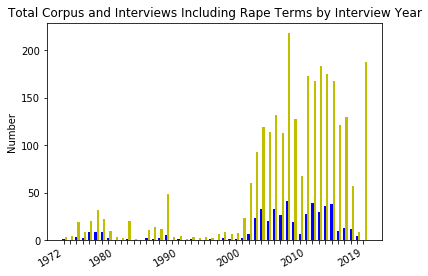

In [56]:
N = 48

ind = np.arange(N) 
values=[]
totals=[]

# some example data

values=hits_formatted
    
    
values = np.array(values)
total=np.array(total)


x = range(len(values))


# and plot it
fig, ax = pyplot.subplots()
hm=ax.bar(ind, values, 0.35, color="b")
total=ax.bar(ind+.35, total, .35, color="y")
ax.set_xticks(ind)
ax.set_xticklabels((1972,"","","","","","","",1980,"","","","","","","","","",1990,"","","","","","","","","",2000,"","","","","","","","","",2010,"","","","","","","","",2019))
ax.set_title('Total Corpus and Interviews Including Rape Terms by Interview Year')
ax.set_ylabel('Number')
pyplot.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')



In [57]:
years=[]
for i in range(1871, 1998):
    years.append(str(i))
years.append("No Info")
total=[]
for i in years:
    total.append(dataformatted["real_interviewee_birth_year"][i])
hits=defaultdict(lambda:0)
print(sum(total))
for x in names:
    id_nums=text_to_ids[x]
    for num in id_nums:
        hits[ids_to_info[num]["birth_year"]]+=1
hits_formatted=[]
for i in years:
    hits_formatted.append(hits[i])
percentage_withNI=[]
for i in range(len(years)):
    if total[i]==0:
        percentage_withNI.append(0)
    else:    
        percentage_withNI.append(int(hits_formatted[i]/total[i]*100))

2733


In [58]:
df_interview_year = pandas.DataFrame([total, hits_formatted, percentage_withNI], index=["total corpus", "in rape cluster", "Percentage of total"], columns=years)

In [59]:
display(df_interview_year)

,1871,1872,1873,1874,1875,...,1994,1995,1996,1997,No Info
total corpus,1,0,0,1,0,...,1,1,1,1,32
in rape cluster,0,0,0,0,0,...,0,0,0,0,0
Percentage of total,0,0,0,0,0,...,0,0,0,0,0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

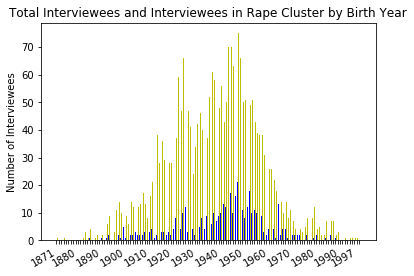

In [60]:
N = 128

ind = np.arange(N) 
values=[]
totals=[]

# some example data

values=hits_formatted
    
    
values = np.array(values)
total=np.array(total)


x = range(len(values))


# and plot it
space=["","","","","","","","",""]
fig, ax = pyplot.subplots()
hm=ax.bar(ind, values, 0.35, color="b")
total=ax.bar(ind+.35, total, .35, color="y")
ax.set_xticks(ind)
ax.set_xticklabels([1871,"","","","","","","","",1880]+space+[1890]+space+[1900]+space+[1910]+space+[1920]+space+[1930]+space+[1940]+space+[1950]+space+[1960]+space+[1970]+space+[1980]+space+[1990, "","","","","","",1997])
ax.set_title('Total Interviewees and Interviewees in Rape Cluster by Birth Year')
ax.set_ylabel('Number of Interviewees')
pyplot.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')